In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import ipywidgets as widgets
from matplotlib.patches import Circle
from matplotlib.patches import PathPatch
from matplotlib.patches import Path
from matplotlib.transforms import Bbox
%matplotlib nbagg 
controles = widgets.VBox([])

Output()

<IPython.core.display.Javascript object>


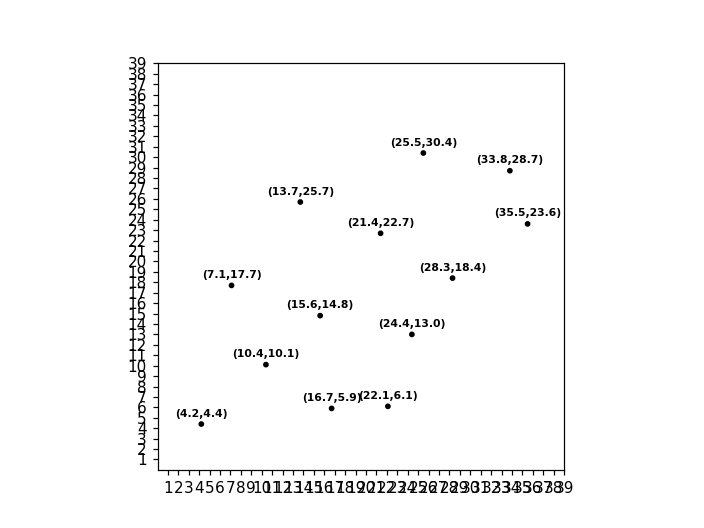

VBox()

Están guardados los puntos
[{'linea': 16.7, 'Q': [(4.2, 4.4), (7.1, 17.7), (10.4, 10.1), (13.7, 25.7), (15.6, 14.8), (16.7, 5.9)], 'R': [(21.4, 22.7), (22.1, 6.1), (24.4, 13.0), (25.5, 30.4), (28.3, 18.4), (33.8, 28.7), (35.5, 23.6)]}, {'linea': 10.4, 'Q': [(4.2, 4.4), (7.1, 17.7), (10.4, 10.1)], 'R': [(13.7, 25.7), (15.6, 14.8), (16.7, 5.9)]}, {'linea': 24.4, 'Q': [(21.4, 22.7), (22.1, 6.1), (24.4, 13.0)], 'R': [(25.5, 30.4), (28.3, 18.4), (33.8, 28.7), (35.5, 23.6)]}, {'linea': 28.3, 'Q': [(25.5, 30.4), (28.3, 18.4)], 'R': [(33.8, 28.7), (35.5, 23.6)]}]


In [2]:

class algoritmo: 
    def __init__(self): 
        self.rastro = [] 
    def closest_points(self,P):
        Px = [p for p in P]
        Px.sort(key = self.by_x)
        Py = [p for p in P]
        Py.sort(key = self.by_y)
        return self.closest_rec(Px,Py) 

    def dist(self,p1,p2): 
        (x,y) = p1
        (u,v) = p2
        return math.sqrt((x - u)**2 + (y - v)**2)

    def by_x(self,elem):
        return elem[0]
    def by_y(self,elem):
        return elem[1]
    def maxim_x(self,Qx): 
        maxim = Qx[0][0]
        for i in range(1,len(Qx)): 
            maxim = max(maxim,Qx[i][0])
        return maxim 
    def build_Sy(self,xstar,Py,delta):
        S = [] 
        for (x,y) in Py: 
            if(self.dist((x,y),(xstar,y)) <= delta): 
                S.append((x,y))
        return S

    def caso_base(self,Px): 
        if(len(Px) == 2): 
            return (Px[0],Px[1])
        if(len(Px) == 3): 
            x,y = Px[0]
            u,v = Px[1]
            l,m = Px[2]
            d1 = self.dist((x,y),(u,v))
            d2 = self.dist((u,v),(l,m))
            d3 = self.dist((x,y),(l,m))
            dm = min(d1,d2,d3)
            if(dm == d1): 
                return ((x,y),(u,v))
            elif(dm == d2): 
                return ((u,v),(l,m))
            else: 
                return ((x,y),(l,m)) 
    def closest_rec(self,Px,Py): 
        #caso base 
        if(len(Px) <= 3): 
            return self.caso_base(Px)
        Qx = [Px[i] for i in range(0,len(Px)//2)]
        Qy = [Py[i] for i in range(0,len(Py)//2)] 
        Rx =  [Px[i] for i in range(len(Px)//2,len(Px))]  
        Ry =  [Py[i] for i in range(len(Py)//2,len(Py))] 
        xstar = self.maxim_x(Qx)
        self.rastro.append({"linea":xstar,"Q":Qx,"R":Rx})
        r1,r2 = self.closest_rec(Qx,Qy)
        q1,q2 = self.closest_rec(Rx,Ry)
        d1 = self.dist(r1,r2)
        d2 = self.dist(q1,q2)
        delta = min(d1,d2)
        Sy = self.build_Sy(xstar,Py,delta) 
        #aquí, tenemos que hacer otra cosa 
        distSy = float('inf') 
        sl = []
        for i in range(0,len(Sy)): 
            for j  in range(1,16):
                if(i + j < len(Sy)): 
                    if(self.dist(Sy[i],Sy[i+j]) < distSy):  
                        s1 = Sy[i]
                        s2 = Sy[i+j]
                        sl = [s1,s2]
                        distSy = self.dist(s1,s2)
        if(distSy <= delta): 
            return (sl[0],sl[1])
        elif(self.dist(r1,r2) < self.dist(q1,q2)):
            return (r1,r2)
        else: 
            return (q1,q2) 
#P = puntos.keys()
#closest_points(P)
out1 = widgets.Output()
display(out1)
class estado_poner_puntos:
    out = out1
    def __init__(self,vars_): 
        self.vars_ = vars_
    @out.capture()
    def onclick(self,event): 
        #poner los vertices 
        x = round(event.xdata,1)
        y = round(event.ydata,1)
        if(x in self.vars_.coordsx or y in self.vars_.coordsy): 
            print("esta")
            return 
        self.vars_.coordsx.append(x)
        self.vars_.coordsy.append(y)
        c = Circle((x,y),radius = 0.2,color = 'black')
        self.vars_.ax.add_patch(c)
        anot = self.vars_.ax.annotate("({},{})".format(x,y), (x,y+1),color='black', weight='bold', fontsize=self.vars_.f_size, ha='center', va='center')
        self.vars_.puntos.append((x,y)) 
    
        
    def ready_button_handler(self,event):
        self.vars_.fig.canvas.mpl_disconnect(self.cid)
        print("Están guardados los puntos")
        self.vars_.alg = algoritmo()
        self.vars_.alg.closest_points(self.vars_.puntos)
        print(self.vars_.alg.rastro)

        
    def main(self): 
        self.cid = self.vars_.fig.canvas.mpl_connect('button_press_event', self.onclick)
        ready_button = widgets.Button(description='listo')
        self.vars_.controles.children = [ready_button] 
        ready_button.on_click(self.ready_button_handler)
        
class variables: 
    def __init__(self): 
        self.fig, self.ax = plt.subplots()
        self.maxim_x = 40
        self.maxim_y = 40
        plt.xticks(range(1,self.maxim_x))
        plt.yticks(range(1,self.maxim_y))
        plt.gca().set_aspect('equal', adjustable='box')
        self.controles = widgets.VBox([])
        display(self.controles)
        #algunas variables globales 
        self.puntos = []
        self.coordsx = []
        self.coordsy = []
        self.f_size = 7 
        self.alg = None
       
    
v = variables()
estado = estado_poner_puntos(v)
estado.main()

<IPython.core.display.Javascript object>


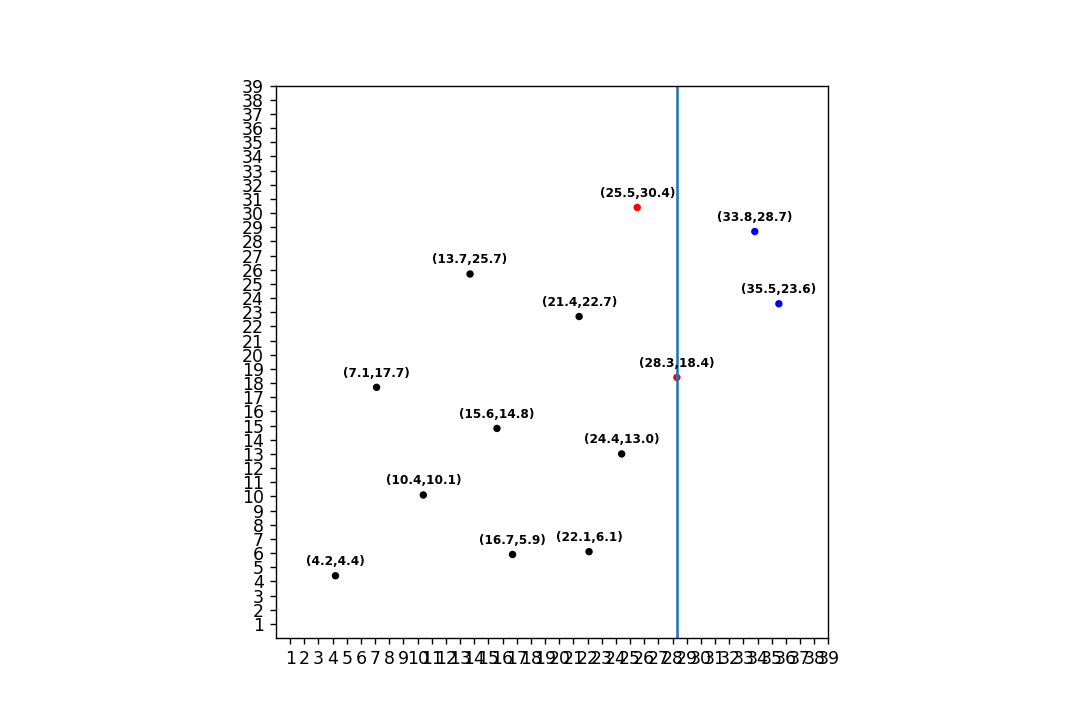

VBox()

[{'linea': 16.7, 'Q': [(4.2, 4.4), (7.1, 17.7), (10.4, 10.1), (13.7, 25.7), (15.6, 14.8), (16.7, 5.9)], 'R': [(21.4, 22.7), (22.1, 6.1), (24.4, 13.0), (25.5, 30.4), (28.3, 18.4), (33.8, 28.7), (35.5, 23.6)]}, {'linea': 10.4, 'Q': [(4.2, 4.4), (7.1, 17.7), (10.4, 10.1)], 'R': [(13.7, 25.7), (15.6, 14.8), (16.7, 5.9)]}, {'linea': 24.4, 'Q': [(21.4, 22.7), (22.1, 6.1), (24.4, 13.0)], 'R': [(25.5, 30.4), (28.3, 18.4), (33.8, 28.7), (35.5, 23.6)]}, {'linea': 28.3, 'Q': [(25.5, 30.4), (28.3, 18.4)], 'R': [(33.8, 28.7), (35.5, 23.6)]}]


IndexError: list index out of range

In [16]:
class ejecutar_algoritmo: 
    def __init__(self): 
        #volver a dibujar los puntos 
        self.fig, self.ax = plt.subplots()
        self.maxim_x = 40
        self.maxim_y = 40
        plt.xticks(range(1,self.maxim_x))
        plt.yticks(range(1,self.maxim_y))
        plt.gca().set_aspect('equal', adjustable='box')
        self.controles = widgets.VBox([])
        display(self.controles) 
        self.f_size = 7 
        self.ind = 0 
        self.current_line = None
        self.current_q = []
        self.current_r = []
        self.im_puntos = dict()
        #necesitamos poner botones 
        #un boton de siguiente 
    def next_button_handler(self,event):
        if(self.current_line != None): 
            self.current_line.set(xdata = v.alg.rastro[self.ind]['linea'])
        else: 
            self.current_line = self.ax.axvline(v.alg.rastro[self.ind]['linea']) 
        #pintar y despintar colores 
        for p in self.current_q:
            self.im_puntos[p][0].set(color = 'black') 
        for p in self.current_r: 
            self.im_puntos[p][0].set(color = 'black')
        self.current_q = []
        self.current_r = []
        for p in v.alg.rastro[self.ind]['Q']:
            self.current_q.append(p)
            self.im_puntos[p][0].set(color = 'red')
        for p in v.alg.rastro[self.ind]['R']: 
            self.current_r.append(p)
            self.im_puntos[p][0].set(color = 'blue')
        self.ind = self.ind + 1
                
    def main(self): 
        next_button = widgets.Button(description='siguiente')
        controles.children = [next_button]
        next_button.on_click(self.next_button_handler)
        display(controles)
    def dibujar_puntos(self): 
        for (x,y) in v.puntos: 
            c = Circle((x,y),radius = 0.2,color = 'black')
            self.ax.add_patch(c)
            anot = self.ax.annotate("({},{})".format(x,y), (x,y+1),color='black', weight='bold', fontsize=self.f_size, ha='center', va='center') 
            self.im_puntos[(x,y)] = (c,anot)
            
ej_al = ejecutar_algoritmo()
ej_al.main()
ej_al.dibujar_puntos()
print(v.alg.rastro)